We save all needed files on google drive and we mount the drive everytime we modify the file and retrain the model. Below down is the script that we use to train, evaluate the model and plot related information. However, the decisive files which are modifed most in this project are called 'racetrack', 'simulation','environment','genetic','model'.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The frist step is to initialize the original population and train them on a straight track with different length but fixed orientation. In this case, we call the funciton 'train' in genetic.py.


In [ ]:
from drive.MyDrive.racecar import genetic
import torch


num_agents=400
generations=51
top_limits=10  #10
file='racecar' #name of saved model
ga=genetic.genetic_algo(processors=24,max_step=250, num_turns=1)
reward1=ga.train(num_agents,generations,top_limits,file)

By using the curriculmn learning strategy, after finding the acceptable model in the first case, we do the next training based on that model. Here we call the function'train2' in genetic.py.

In [23]:
from drive.MyDrive.racecar import genetic
import torch


num_agents=400
generations=121
top_limits=10  #10
file='racecar' #name of saved model
ga=genetic.genetic_algo(processors=24,max_step=250, num_turns=2)#1500,20
meanreward,topreward=ga.train2(num_agents,generations,top_limits,file)


流式输出内容被截断，只能显示最后 5000 行内容。
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT A WALL! 0.7340439959747006
I HIT A WALL! 0.7170222022641876
I HIT A WALL! 0.7206436969483782
I HIT A WALL! 0.7119333091749445
I HIT A WALL! 0.7018685893750586
I HIT A WALL! 10.831689653235403
I HIT THE GOAL!
I HIT A WALL! 9.568618356332086
I HIT THE GOAL!
I HIT A WALL! 6.995806153648837
I HIT A WALL! 11.002803155341228
I HIT THE GOAL!
I HIT A WALL! 7.683979682598996
I HIT A WALL! 4.434384140166655
I HIT A WALL! 7.644547387735846
I HIT A WALL! 3.2095241489347366
I HIT THE GOAL!
I HIT THE GOAL!
I HIT A WALL! 0.8385646048597657
I HIT THE GOAL!
I HIT THE GOAL!
I HIT THE GOAL!
I HIT A WALL! 0.790437516435413
I HIT THE GOAL!
I HIT A WALL! 0.7759003062678125
I HIT A WALL! 0.7098960930088597
I HIT A WALL! 0.7451682866440721
I HIT THE GOAL!
I

In [24]:
print(meanreward)

[-118.79435787023267, -124.67583323447246, -115.67483963649022, -111.56751546450481, -122.75358834014826, -117.68178783165642, -101.75372849227675, -55.71137609186409, -103.19076455068442, -101.04823031098651, -110.85988772105863, -125.80409926621002, -91.4869981888884, -110.00610391677942, -121.37514924675293, -109.38421905313237, -122.76355905678746, -93.02341149867645, -74.52114257060846, -132.19976346694978, -119.03739128829976, -104.54290850962511, -130.79219424482736, -107.60123643937904, -118.78927830945631, -108.68157070131532, -144.9093984655557, -122.0745892974005, -153.0872347308271, -134.2794434110333, -120.93550069348031, -113.53241126843378, -131.99569799351747, -143.9669229778595, -121.74833059050356, -102.50451232354983, -126.24103704066269, -131.9271706341958, -80.07912053190341, -116.29814766197886, -119.56316919317544, -90.2503824469269, -124.72324543422708, -133.13782504631757, -149.7388048046714, -119.40964942146381, -101.43978972980852, -108.67994045986185, -110.1

Save fitness values during training

In [29]:
import numpy as np
np.savetxt('/content/drive/MyDrive/racecar/turn_mean.txt',meanreward)# mean reward of all
np.savetxt('/content/drive/MyDrive/racecar/turn_top.txt',topreward) # mean reward of top 5


Plot the fitness value along generations

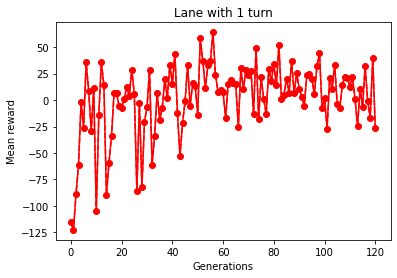

In [31]:
import numpy as np
import matplotlib.pyplot as plt

b=np.loadtxt('/content/drive/MyDrive/racecar/turn_top.txt')

index = [i for i in range(len(a))]
l1 = plt.plot(index,b,'r--',label='type1')
plt.plot(index,b,'ro-')
plt.xlabel('Generations')
plt.ylabel('Mean reward')
plt.title('Lane with 1 turn')
#plt.legend()
plt.show()# import matplotlib.pyplot as plt

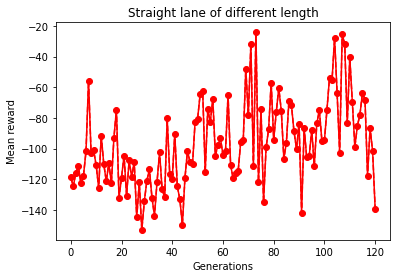

In [26]:
import matplotlib.pyplot as plt
import numpy as np

a=np.loadtxt('/content/drive/MyDrive/racecar/turn_mean.txt')

index = [i for i in range(len(a))]
l1 = plt.plot(index,a,'r--',label='type1')
plt.plot(index,a,'ro-')
plt.xlabel('Generations')
plt.ylabel('Mean reward')
plt.title('Lane with 1 turn')
#plt.legend()
plt.show()# import matplotlib.pyplot as plt

i.e plot the fitness value of the model of straight track with fixed direction


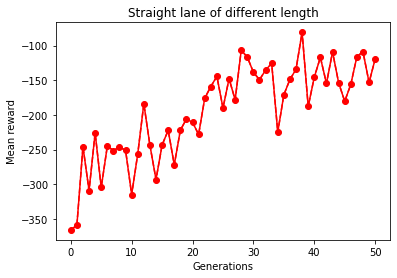

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a=np.loadtxt('/content/drive/MyDrive/racecar/straight.txt')

index = [i for i in range(len(a))]
l1 = plt.plot(index,a,'r--',label='type1')
plt.plot(index,a,'ro-')
plt.xlabel('Generations')
plt.ylabel('Mean reward')
plt.title('Straight lane of different length')
#plt.legend()
plt.show()# import matplotlib.pyplot as plt

When finish a training process in one stage, evaluation is needed to find the arrival rate of the vehicle. This can also be used to estimate wether the neural network has made progress through generations. If not, what the problem might be, and how could we modify the algorithm used.


I HIT THE GOAL!
[0, 0.0984295431710773, 0.1968590863421546, 0.29528862951323187, 0.3844726878317275, 0.45603420463648964, 0.5032514082080635, 0.5216891894528929, 0.5401269724755474, 0.5873441792640632, 0.6589056986101551, 0.7480897585556613, 0.8372738185011674, 0.9088353378472593, 0.9803968271120262, 1.0695808463822918, 1.1587648656525573, 1.2303263214654672, 1.3018877628393175, 1.3910717625854259, 1.4802557623315342, 1.5518171876484717, 1.623368112688933, 1.7125379114126793, 1.8017077101364256, 1.8732469574842594, 1.9447803344945358, 2.033942192414228, 2.12310405033392, 2.194630899419768, 2.2661477138147066, 2.3552959946555854, 2.444444275496464, 2.5159499312153004, 2.587433698782722, 2.676552350277147, 2.765671002671434, 2.8371304324291553, 2.9085877868540506, 2.997703451464293, 3.0868188964845418, 3.158273322668091, 3.229704468028384, 3.3187882889005964, 3.4078720007393914, 3.4792769526420493, 3.5506723994045033, 3.63974322690678, 3.728814048999629, 3.800198914650136, 3.847193118281

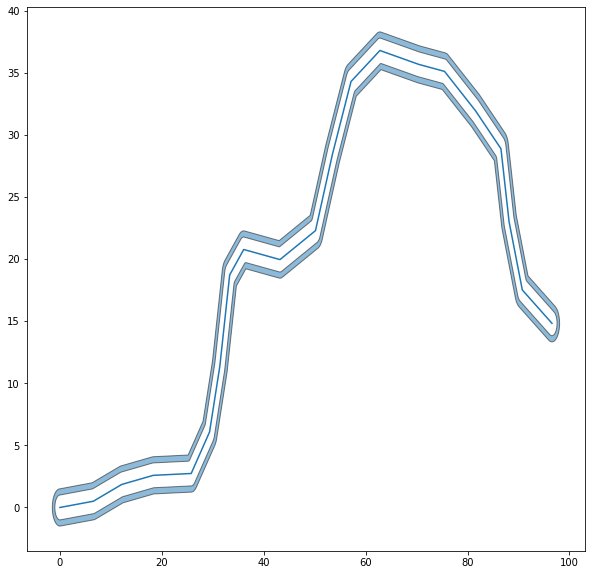

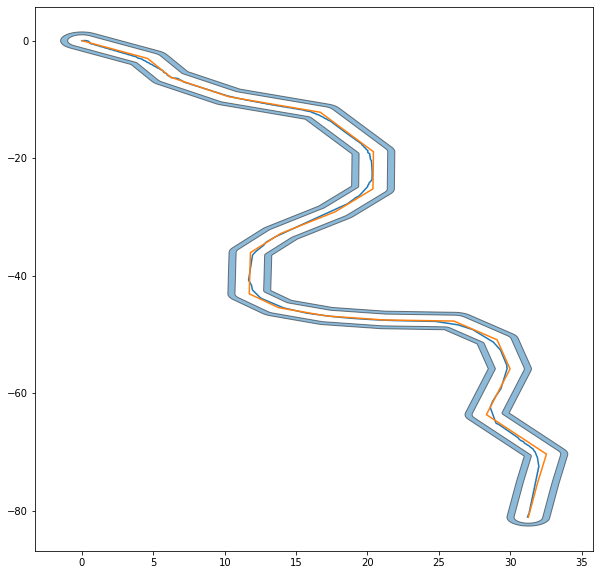

In [ ]:
from drive.MyDrive.racecar import genetic_ev
import torch


num_agents=400
generations=51
top_limits=10  #10
file='racecar' #name of saved model
ga=genetic_ev.genetic_algo(processors=24,max_step=1500, num_turns=20)
file1='drive/MyDrive/racecar/training_model/racecar_deqinracecar_30_fnn_turn20_final'
x,y,action_1,action_2=ga.evaluation(num_ev=10, file1=file1)



Plot speed and the steering angles

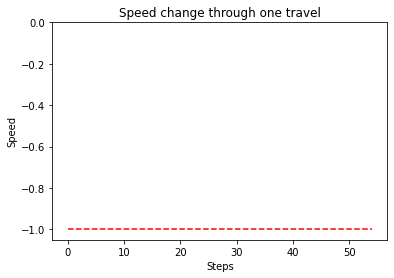

In [ ]:
speed = action_1

import matplotlib.pyplot as plt

index = [i for i in range(len(action_1))]
l1 = plt.plot(index,speed,'r--',label='type1')
#plt.plot(index,a,'ro-')
plt.xlabel('Steps')
plt.ylabel('Speed')
plt.title('Speed change through one travel')
plt.ylim([-1.05,0])
#plt.legend()
plt.show()# import matplotlib.pyplot as plt


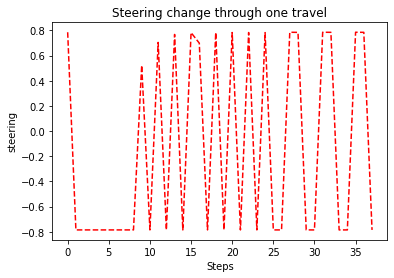

In [ ]:
steering = action_2

import matplotlib.pyplot as plt

index = [i for i in range(len(steering))]
l1 = plt.plot(index,steering,'r--',label='type1')
#plt.plot(index,a,'ro-')
plt.xlabel('Steps')
plt.ylabel('steering')
plt.title('Steering change through one travel')

#plt.legend()
plt.show()# import matplotlib.pyplot as plt